# Study from the order-parameter point of view.
- How do the statistics get influenced by the order-param valus ?
- How do the minima typeget influenced by the order-param valus ? 

In [1]:
import numpy as np
import re
%run "elegant_plot.ipynb" 

Populating the interactive namespace from numpy and matplotlib


In [2]:
fig_save_path = r"\\storage01.amolf.nl\data\AMOLF\users\singh\Martin\Evolutionary Design"\
                r"\Thesis Chapter\Chapter 2.0\Figures\Section 10"

In [3]:
# Load data 
data_dir       =  r"\\storage01.amolf.nl\data\AMOLF\users\singh\Lisa PSO Runs\Order Parameter Study\100000 Runs\Data"
order_param    =  np.load(data_dir + r"\Data\order_param_r2.npy")
best_cost_grid =  np.load(data_dir + r"\Data\best_cost_grid.npy")

In [4]:
import colormaps as cmaps
plt.register_cmap(name='viridis', cmap=cmaps.viridis)
cmap = cmaps.viridis
norm = mpl.colors.LogNorm(vmin=1, vmax=100)

In [5]:
#matplotlib.rc('text', usetex=True)
#matplotlib.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]

In [60]:
r_vals = [[3e-3, 4e-2],[0.1-1e-2, 0.1+1e-2],[0.5-1e-3, 0.5+1e-3],[1-1e-3, 1+1e-3]]
r_vals_str = [['0.0', '4e-2'],['0.1-1e-2', '0.1+1e-2'],['0.5-1e-3', '0.5+1e-3'],['1-1e-3', '1+1e-3']]
xtickpoints = [[3e-3, 4e-2], [0.090,0.1, 0.1+1e-2], [0.5-1e-3,0.5, 0.5+1e-3], [1-1e-3,1, 1+1e-3]]
xtickLabels = [[r'$3.10^{-3}$', r'$4.10^{-2}$'], [r'$0.1\!\!\!-\!\!\!10^{-2}$','0.1', r'$0.1+10^{-2}$'], 
               [r'$0.5-10^{-3}$','0.5', r'$0.5+10^{-3}$'], [r'$1.0-10^{-3}$','1', r'$1.0+10^{-3}$']]

fig = fullfig(hf = 2.0)
ax_main = plt.gca()

ax1 = plt.subplot(2,2,1);  ax1.set_ylabel(r'$\boldsymbol{f}([x_i^k]_{i,k_{max}})$'); ax1.yaxis.set_label_coords(-0.25, 0)
ax2 = plt.subplot(2,2,2);  ax2.set_yticklabels([])
ax3 = plt.subplot(2,2,3);  ax3.set_yticklabels([])
ax4 = plt.subplot(2,2,4);  ax4.set_yticklabels([])




ax_list = [ax1, ax2, ax3, ax4]
for r_counter in range(4):
        r_low_lim = r_vals[r_counter][0]; r_high_lim = r_vals[r_counter][1] 
        idx_inTup = np.where((order_param >r_low_lim) & (order_param < r_high_lim)) 
        num_sol   = len(order_param[(order_param > r_low_lim) & (order_param < r_high_lim)])
        print('Number of solutions that have (order_param < {0})'.format(r_vals_str[r_counter][0]), 
              r'& (order_param > {0}):'.format(r_vals_str[r_counter][1]), num_sol)

        idx_inArr = np.zeros((num_sol, 3), dtype = int64)
        for i in range(num_sol):
            idx_inArr[i,0] = idx_inTup[0][i]
            idx_inArr[i,1] = idx_inTup[1][i]
            idx_inArr[i,2] = idx_inTup[2][i]

        pert_objval = np.load(r"\\storage01.amolf.nl\data\AMOLF\users\singh\Martin\Evolutionary Design\Thesis Chapter\Figures\pdf"
                r"\Order Parameter\Data\{0}ORDER_PARAM{1}.npy".format(r_vals_str[r_counter][0], r_vals_str[r_counter][1]))

        # Calculate the % of perturbations that lead to a decrease in the objective function value
        neg_Pert = np.zeros((num_sol, 1))         #negative perturbations that lead 
        marker_size= np.zeros((num_sol, 1))          #to a decrease in objective function value
        for i in range(num_sol):
            i_ = idx_inArr[i, 0]
            j_ = idx_inArr[i, 1]
            k_ = idx_inArr[i, 2]
            temp1 = pert_objval[i,:]
            neg_Pert[i,0] = len(temp1[temp1 <= best_cost_grid[i_, j_, k_]])
            marker_size[i,0] = pert_objval[i,:].max()/pert_objval[i,:].min()

        #std_dev_min = std_dev.min()
        #std_dev_max = std_dev.max()

        # quick plot to visualize results through a colormap
        import colormaps as cmaps
        plt.register_cmap(name='viridis', cmap=cmaps.viridis)
        cmap = cmaps.viridis
        norm = mpl.colors.LogNorm(vmin=1, vmax=100)
        
        #ax = plt.subplot(2,2,r_counter, aspect = 'equal')
        #halffig()
        ax = ax_list[r_counter]
        ax.set_yscale('log')
        ax.set_xscale('log')

        for i in range(num_sol):
            i_ = idx_inArr[i, 0]
            j_ = idx_inArr[i, 1]
            k_ = idx_inArr[i, 2]
            
            if(1000000*np.std(pert_objval[i,:]) < 1000):
                ax.scatter(order_param[i_,j_,k_], best_cost_grid[i_,j_,k_], 
                color = 'orangered' if neg_Pert[i] ==0 else cmap(norm((neg_Pert[i]+1)/5)), 
                       s = 1000000*np.std(pert_objval[i,:]) )
                       #s = 50*np.std(pert_objval[i,:])/np.mean(pert_objval[i,:]))
                           #s = 1000000*np.std(pert_objval[i,:]) )
                       #

        ax.set_xlim([r_low_lim, r_high_lim])
        ax.set_ylim([1e-8, 1e-2])
        #ax.set_xlabel(r'$\boldsymbol{r}$')
        
        #ax.set_xlabel(r'$\boldsymbol{\phi}$')
        #ax.set_ylabel(r'$\boldsymbol{f}([x_i^k]_{i,k_{max}})$')
        #ax = plt.gca()
        ax.set_xticks(xtickpoints[r_counter])
        ax.set_xticklabels(xtickpoints[r_counter])
        
        if(r_counter == 1 or r_counter == 3):
            ax.set_yticklabels([])

        h = plt.scatter([-1], [-1], c=[1], cmap = cmaps.viridis, norm=norm)
        #plt.ylim([1e-8, 1e-2])
        clr_bar = colorbar(h, label = r'$\%$[$\boldsymbol{f}([x_i^k]_{i,k_{max}}+\epsilon d)<\boldsymbol{f}([x_i^k]_{i,k_{max}})$]')
        clr_bar.set_ticklabels([1, 10, 100])       

        
        #if(r_counter == 1 or r_counter == 3):
        #    ax.set_yticklabels = ([])




#plt.savefig(fig_save_path + r"\TRIAL_ORDER_PARAM.pdf".format(r_counter), format='pdf',bbox_inches='tight')
#plt.show()


C:\Users\singh\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:21: RuntimeWarning: invalid value encountered in greater
C:\Users\singh\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:21: RuntimeWarning: invalid value encountered in less
C:\Users\singh\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:22: RuntimeWarning: invalid value encountered in greater
C:\Users\singh\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:22: RuntimeWarning: invalid value encountered in less
C:\Users\singh\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\colorbar.py:407: UserWarning: set_ticks() must have been called.
  warnings.warn("set_ticks() must have been called.")


Number of solutions that have (order_param < 0.0) & (order_param > 4e-2): 270
Number of solutions that have (order_param < 0.1-1e-2) & (order_param > 0.1+1e-2): 690
Number of solutions that have (order_param < 0.5-1e-3) & (order_param > 0.5+1e-3): 180
Number of solutions that have (order_param < 1-1e-3) & (order_param > 1+1e-3): 131


ValueError: Data has no positive values, and therefore can not be log-scaled.

C:\Users\singh\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


ValueError: Data has no positive values, and therefore can not be log-scaled.

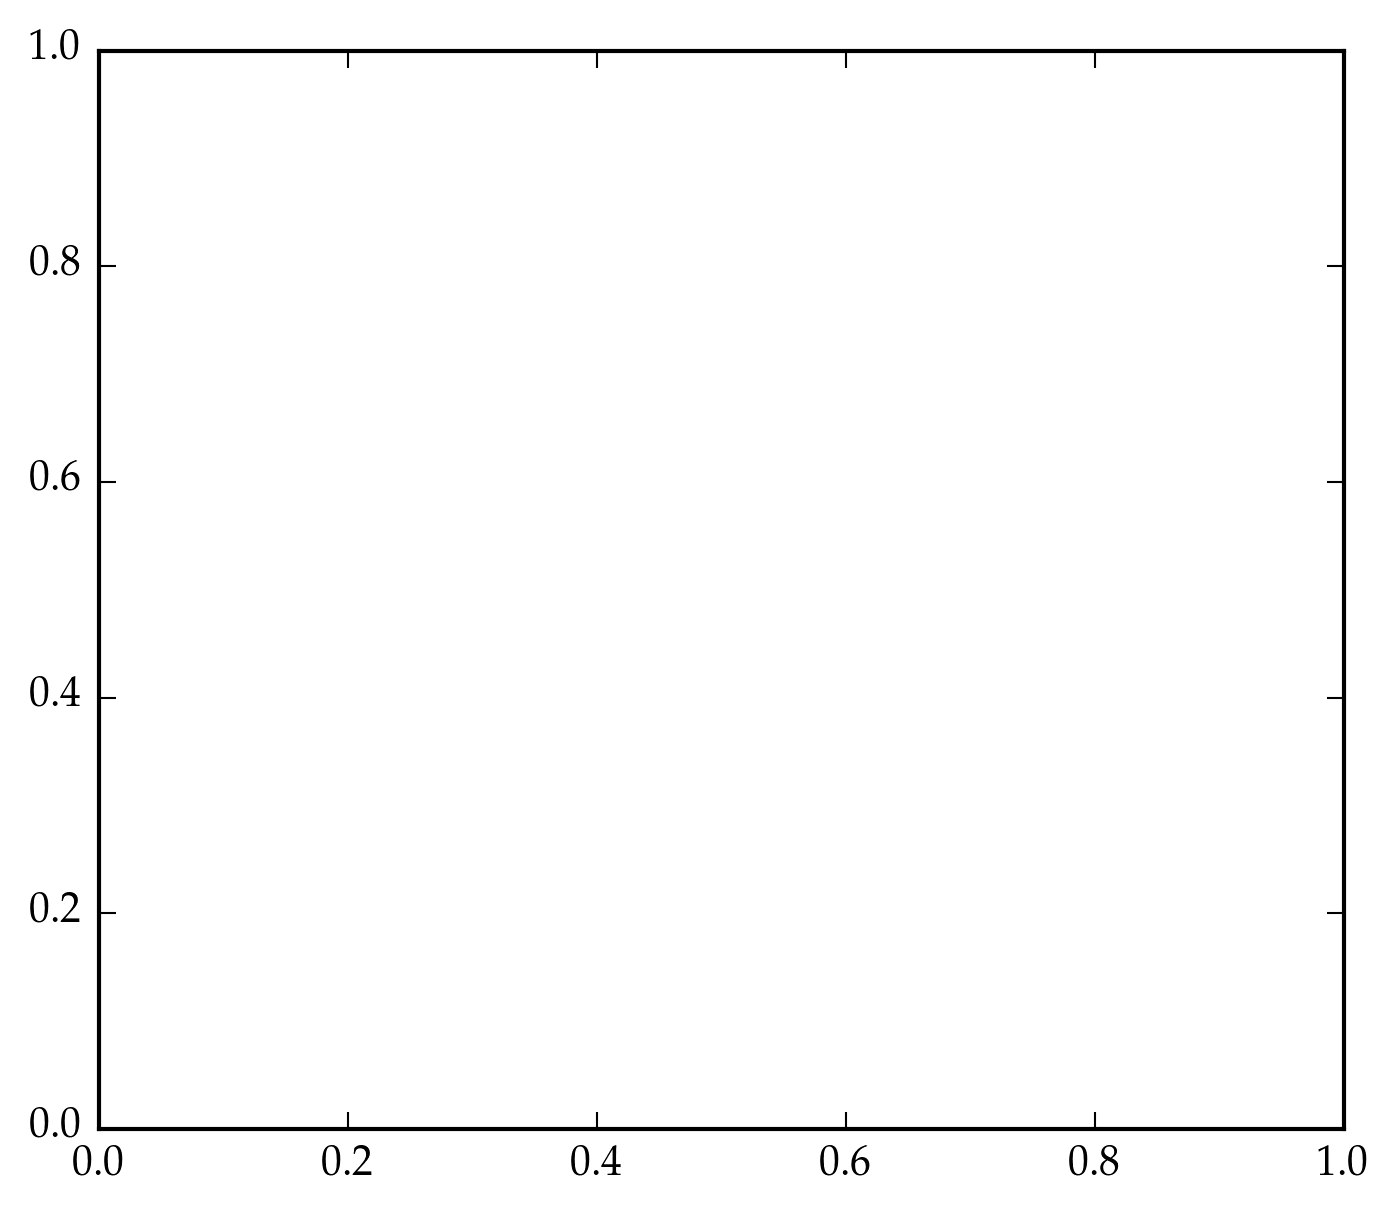

In [57]:
fig = fullfig(hf = 2.0)
ax_main = fig.gca()

In [ ]:
1.6e-7*20/22